In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import importlib
import iris_segmentation_utils
importlib.reload(iris_segmentation_utils)
from iris_segmentation_utils import *

In [18]:
def load_image(image_path):
    try:
        img = Image.open(f"{image_path}")
        return img
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [23]:
data=pd.read_csv('data/image_data.csv')
data['image'] = data['image_path'].apply(lambda x: load_image(f'data/{x}'))
data.head()

,person,eye,image_path,image
0,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
1,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
2,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
3,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
4,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...


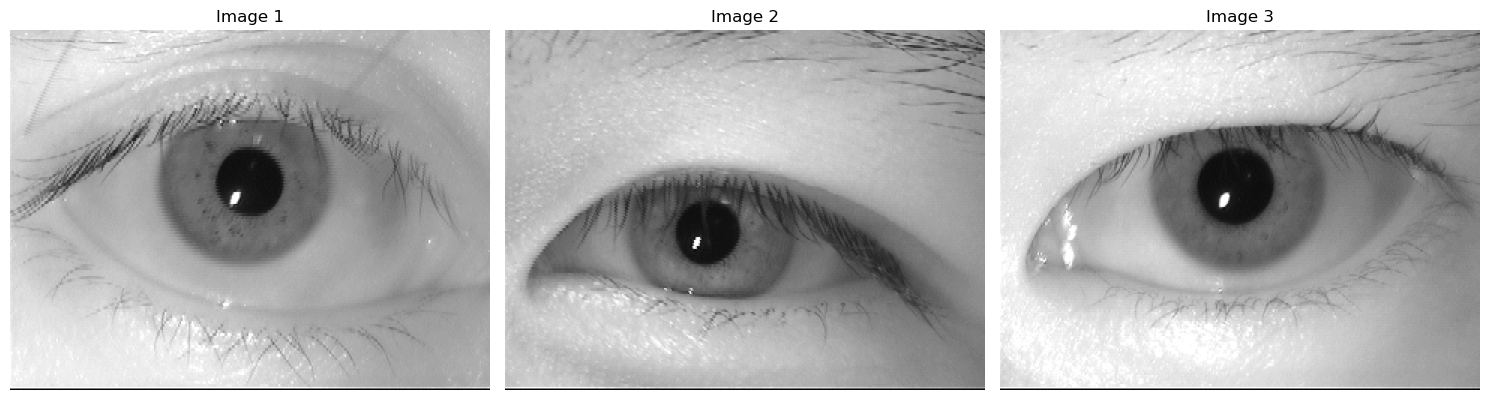

In [32]:
sample_images = data['image'].sample(3)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#displaying sample images
for i, ax in enumerate(axes):
    ax.imshow(sample_images.iloc[i], cmap='gray')
    ax.axis('off') 
    ax.set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

#### Converting all images to grayscale

In [45]:
data['image'] = data['image'].apply(lambda x: convert_to_grayscale(x))

#### Binarization of iris experiments

binarization for x_i: 1.0


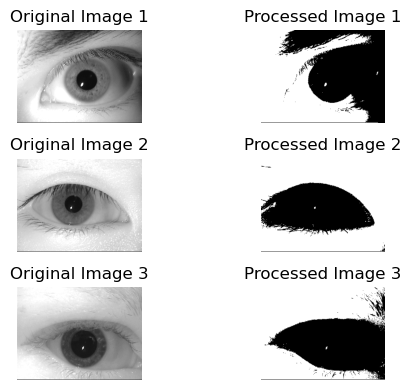

binarization for x_i: 2.0


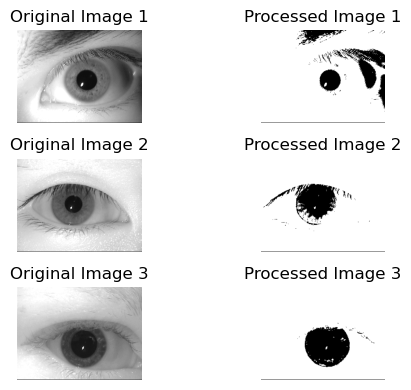

binarization for x_i: 3.0


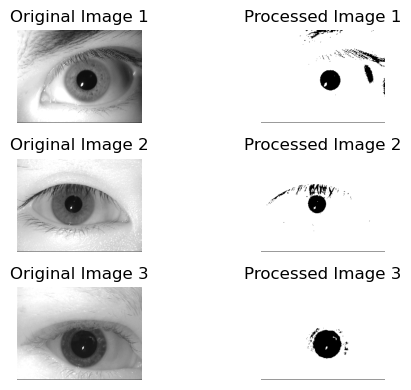

binarization for x_i: 4.0


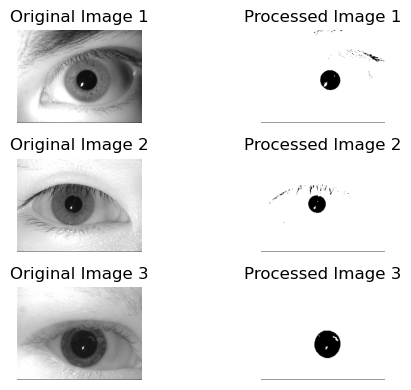

binarization for x_i: 5.0


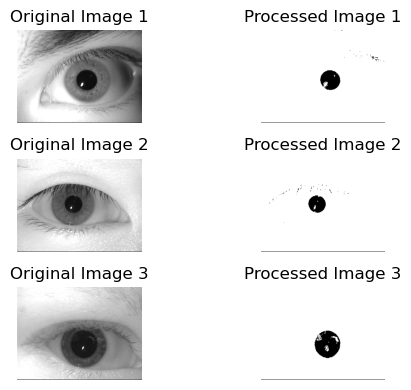

binarization for x_i: 6.0


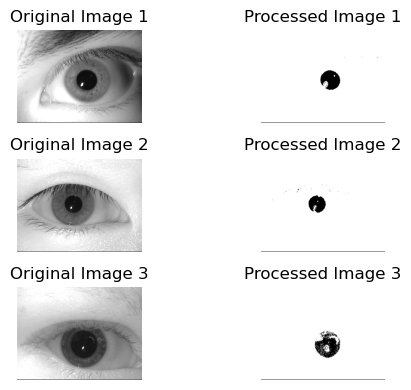

binarization for x_i: 7.0


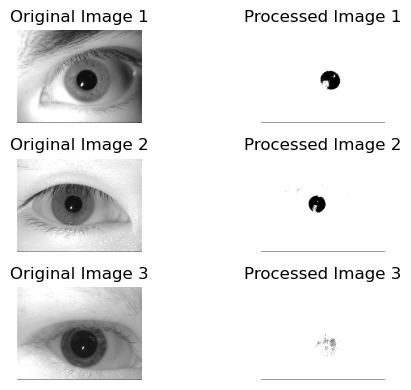

binarization for x_i: 8.0


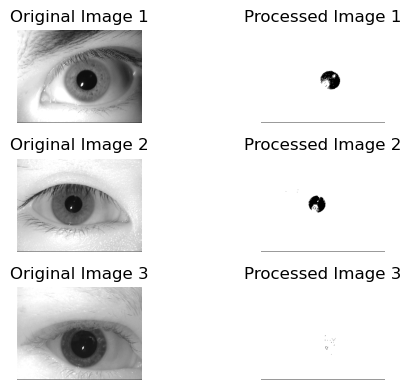

binarization for x_i: 9.0


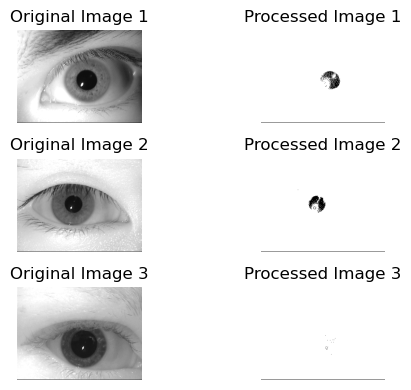

binarization for x_i: 10.0


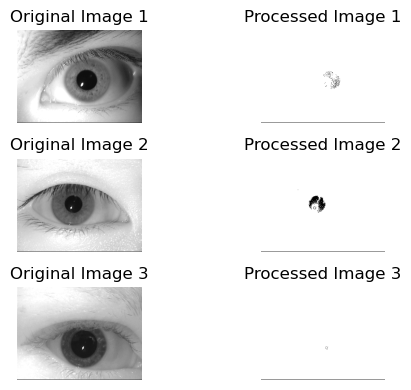

In [155]:
X_I=np.linspace(1,10,10)
sample_images = data['image'].sample(3)
for x_i in X_I:
    print('binarization for x_i:', x_i)
    processed_images = sample_images.apply(lambda x: iris_binarization(x, x_i))
    plot_images_experiments(sample_images, processed_images, n=3)

Empirical results suggest that the optimal value for X_I lies within the range [1, 2].

binarization for x_i: 1.00


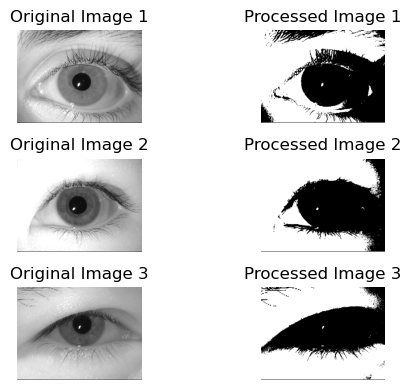

binarization for x_i: 1.10


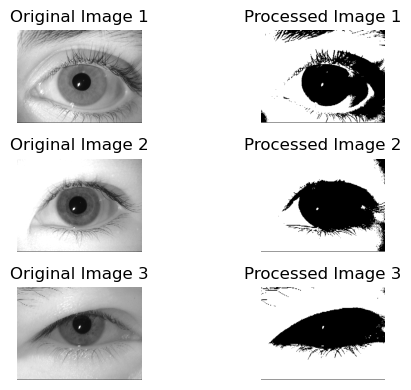

binarization for x_i: 1.20


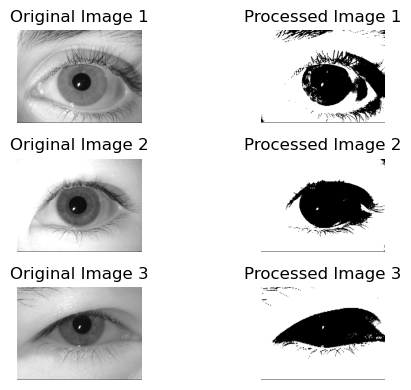

binarization for x_i: 1.30


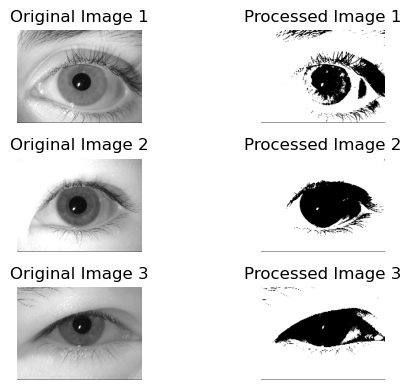

binarization for x_i: 1.40


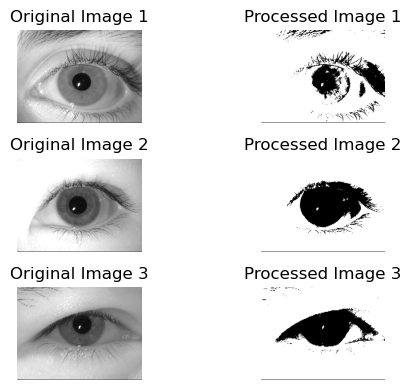

binarization for x_i: 1.50


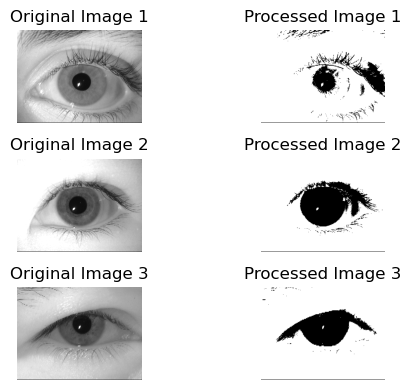

binarization for x_i: 1.60


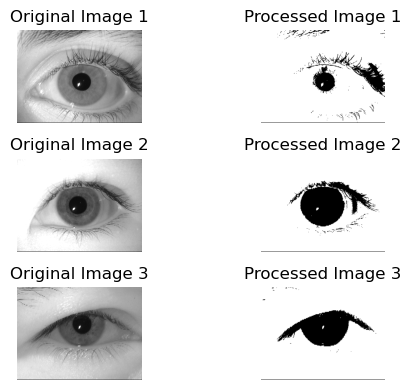

binarization for x_i: 1.70


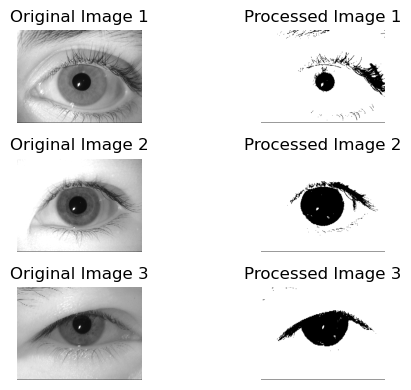

binarization for x_i: 1.80


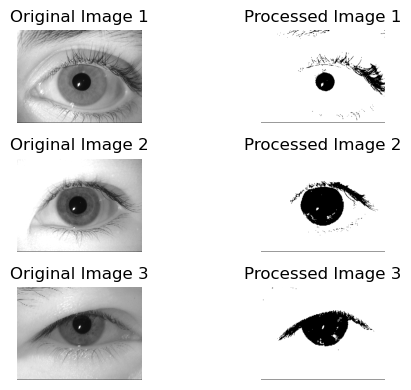

binarization for x_i: 1.90


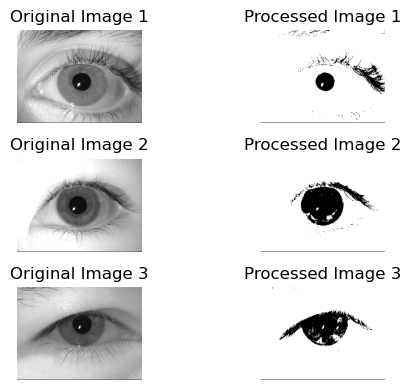

binarization for x_i: 2.00


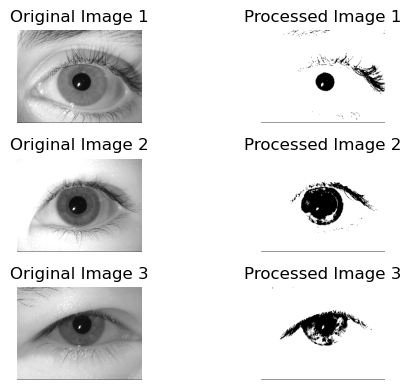

In [157]:
X_I=np.linspace(1,2, 11) #unifromly distributed values between 1 and 2
sample_images = data['image'].sample(3)
for x_i in X_I:
    print(f"binarization for x_i: {x_i:.2f}")
    processed_images = sample_images.apply(lambda x: iris_binarization(x, x_i))
    plot_images_experiments(sample_images, processed_images, n=3)

observation: lighter eye colors are fading when X_I is more than 1.5

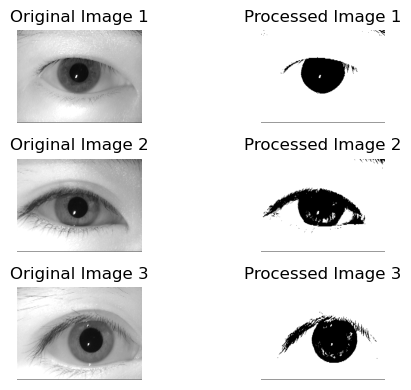

In [192]:
X_I=1.56
sample_images = data['image'].sample(3)
processed_images = sample_images.apply(lambda x: iris_binarization(x, X_I))
plot_images_experiments(sample_images, processed_images, n=3)

#### Binarization of pupil experiments

Since pupils are typically darker than irises, we need a higher binarization threshold for the pupil. This implies that X_P should be smaller than X_I, resulting in P_P = P / X_P being greater than P_I = P / X_I.

binarization for x_p: 5.00


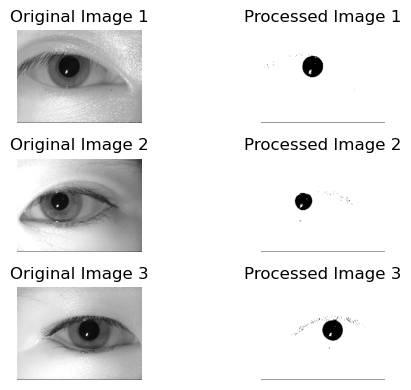

binarization for x_p: 6.11


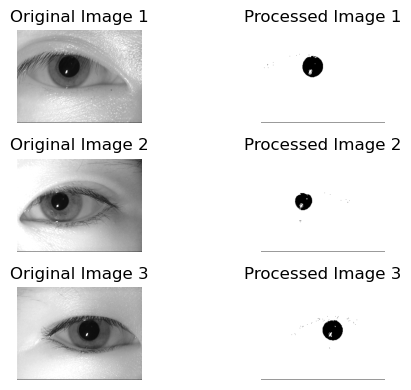

binarization for x_p: 7.22


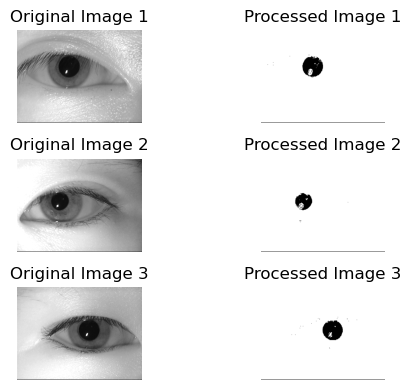

binarization for x_p: 8.33


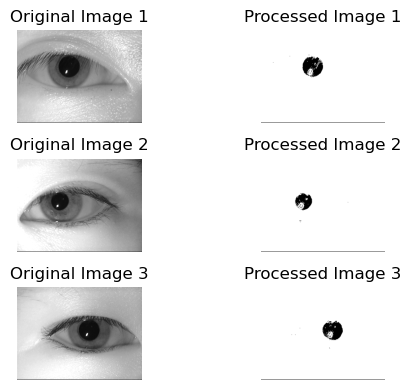

binarization for x_p: 9.44


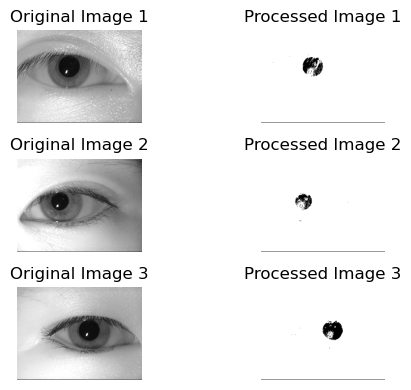

binarization for x_p: 10.56


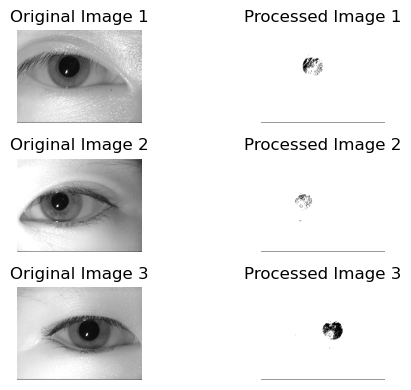

binarization for x_p: 11.67


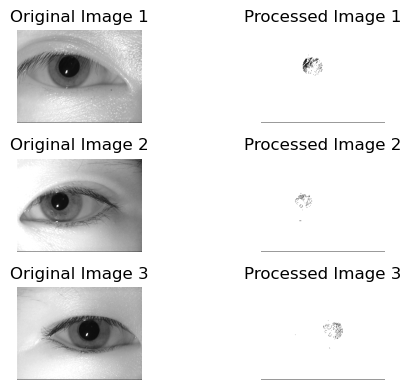

binarization for x_p: 12.78


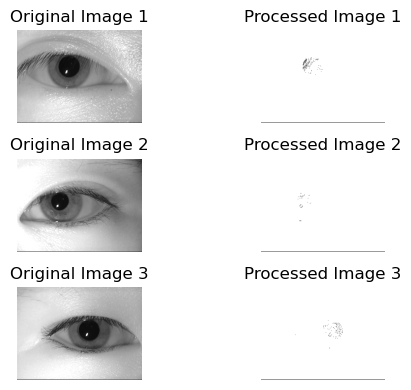

binarization for x_p: 13.89


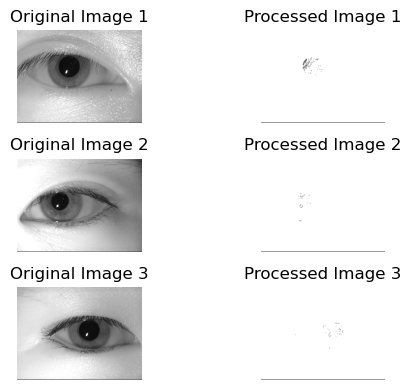

binarization for x_p: 15.00


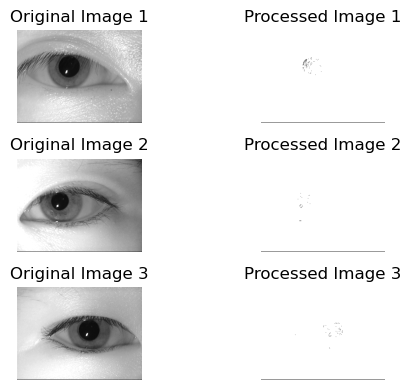

In [ ]:
X_P=np.linspace(5, 15, 10) #unifromly distributed values between 5 and 15
sample_images = data['image'].sample(3)
for x_p in X_P:
    print(f"binarization for x_p: {x_p:.2f}")
    processed_images = sample_images.apply(lambda x: pupil_binarization(x, x_p))
    plot_images_experiments(sample_images, processed_images, n=3)